In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('data-input.csv')
print(df)

In [ ]:
df.to_csv('data.csv')

In [ ]:
df.head()

Found how to do most of this from "https://realpython.com/python-data-cleaning-numpy-pandas/"

Just removing some of the columns that we dont really care about or have overlap with other columns.

In [ ]:
to_drop = ['keywords',
            'homepage',
            'production_countries',
            'spoken_languages',
            'status',
            'tagline',
            'original_title']

new_names =  {'original_language': 'language'}
df.drop(to_drop, inplace=True, axis=1)
df.rename(columns=new_names, inplace=True)

# There was a bunch of rows that had 0 runtime/revenue that were skewing all my data. hopefully this helps?
df = df[df.revenue != 0]
df = df[df.runtime != 0]
df = df[df.vote_count != 0]

df.describe()

In [ ]:
df.head()

,budget,genres,id,language,overview,popularity,production_companies,release_date,revenue,runtime,title,vote_average,vote_count,year,month
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,Avatar,7.2,11800,2009,12
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,2007,5
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,en,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,Spectre,6.3,4466,2015,10
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,en,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,2012,7
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,en,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,John Carter,6.1,2124,2012,3


In [ ]:
# took from here https://www.interviewqs.com/ddi-code-snippets/extract-month-year-pandas
# getting year month day for future calculations potentially
import datetime

df['year'] = pd.DatetimeIndex(df['release_date']).year
df['month'] = pd.DatetimeIndex(df['release_date']).month
df['day'] = pd.DatetimeIndex(df['release_date']).day

df.head()

In [ ]:
# I had a value in my csv in 1927 with a 93 million dollar budget. I looked it up and this was incorrect
# So I needed to clean this datapoint and remove it from the csv
df = df[df.year != 1927]

In [ ]:
df.to_csv('data-cleaned.csv')

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

data = pd.read_csv(r'data-cleaned.csv')

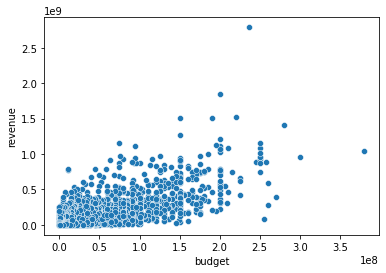

In [ ]:
plot1 = sns.scatterplot(x="budget", y="revenue", data=data)

plt.show()

# wouldnt save the jpg when I did it same as below for some reason.
fig = plot1.get_figure()
fig.savefig("plot1.jpg")

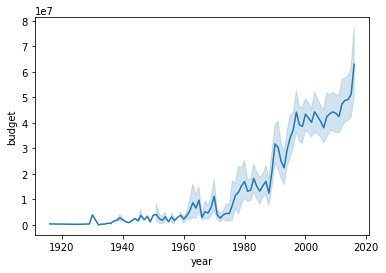

In [ ]:
plot2 = sns.lineplot(x="year", y="budget", data=data)

plt.show

plt.savefig("plot2.jpg")

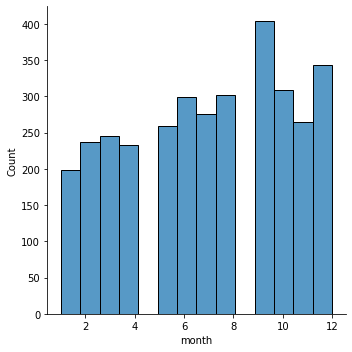

In [ ]:
plot3 = sns.displot(data['month'])

plt.show

plt.savefig("plot3.jpg")